In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("50_Startups.csv")

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
import math

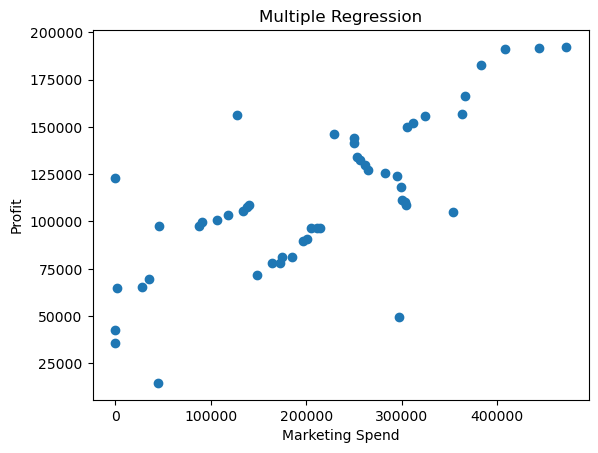

In [6]:
#A scatter plot on the correlation between marketing spend and profit
plt.scatter(dataset['Marketing Spend'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

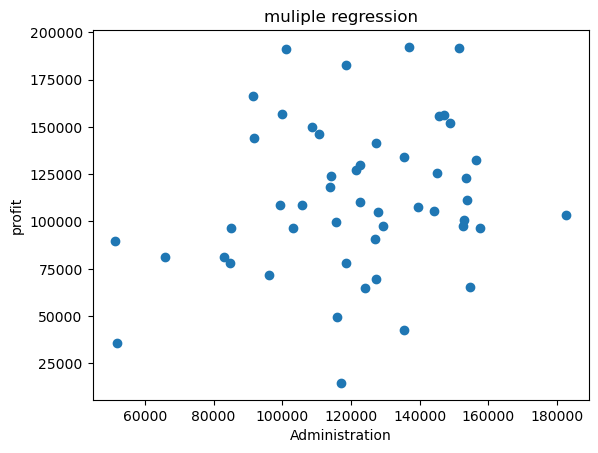

In [7]:
#scatter plot on the correlation between adminstration and profite
plt.scatter(dataset['Administration'],dataset['Profit'])
plt.title("muliple regression")
plt.xlabel('Administration')
plt.ylabel('profit')
plt.show()

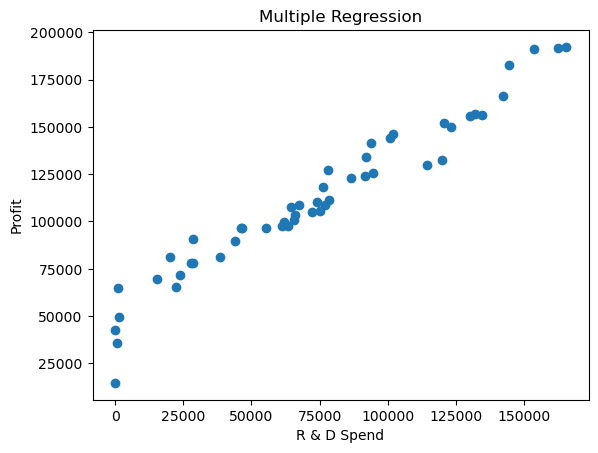

In [8]:
#A scatter plot on the correltion between profit and R&D spend
plt.scatter(dataset['R&D Spend'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('R & D Spend')
plt.ylabel('Profit')
plt.show()

In [9]:
#taking in account caregorical data by envoding it
dataset['newyork']=np.where(dataset['State'] == 'New York' , 1, 0)
dataset['florida']=np.where(dataset['State'] == 'Florida' , 1, 0)
dataset['California']=np.where(dataset['State'] == 'California' , 1, 0)
dataset['profit'] = dataset['Profit']

In [10]:
#dropping the cartegorical column and the target ine too
dataset.drop(columns=['State'], axis=1,inplace=True)
dataset.drop(columns=['Profit'], axis=1,inplace=True)

In [11]:
#cheking our predicter variables and response variable
print(dataset.head())

   R&D Spend  Administration  Marketing Spend  newyork  florida  California  \
0  165349.20       136897.80        471784.10        1        0           0   
1  162597.70       151377.59        443898.53        0        0           1   
2  153441.51       101145.55        407934.54        0        1           0   
3  144372.41       118671.85        383199.62        1        0           0   
4  142107.34        91391.77        366168.42        0        1           0   

      profit  
0  192261.83  
1  191792.06  
2  191050.39  
3  182901.99  
4  166187.94  


In [12]:
X=dataset.iloc[:,:6]
y=dataset.iloc[:,6:]

In [14]:
X

,R&D Spend,Administration,Marketing Spend,newyork,florida,California
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,0,1
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,1,0,0
6,134615.46,147198.87,127716.82,0,0,1
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,1,0,0
9,123334.88,108679.17,304981.62,0,0,1


In [16]:
y

,profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.25)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
X_train[0:5]

array([[0.2807759 , 1.        , 0.44680961, 0.        , 0.        ,
        1.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 1.        ,
        0.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 1.        ,
        0.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ]])

In [21]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [22]:
ypred = model.predict(X_test)

In [23]:
print(ypred)

[[ 93650.82471121]
 [130453.10409647]
 [130900.90870155]
 [ 54862.67668467]
 [189306.7227304 ]
 [109400.11794868]
 [ 48212.43835191]
 [ 86687.13814516]
 [108016.10602114]
 [175844.76586505]
 [ 84868.30291053]
 [ 75007.98846092]
 [101823.21687618]]


In [24]:
math.sqrt(mean_squared_error(y_test, ypred))

15158.160512416207

In [25]:
r2_score(y_test, ypred) 

0.7870119374877249